In [277]:
import scipy.integrate as integrate
import scipy.special as special
import numpy as np
from matplotlib import pyplot as plt
# estimations of equivalent width 
c = 3.0*10**10 #km/s
e = 4.8032042710*10**(-10)
me =  9.10938214*10**(-28)
h =  6.62606896*10**(-27)
b = 6.0*10**5 #cm/s

Pi = np.pi

flam = np.linspace(1e-11,1.5e-6,100)
N = 1.0e15

def tau(x,flambda):
    return (np.sqrt(np.pi)*e**2/(me*b*c)) * flambda * N * np.exp(-(c*x/b)**2)

# Equivalent Width for a range of x values (Don't multiply by dx for additions...) DON'T USE until dx defined
def W(flambda):
    Wi = []
    for x in np.linspace(-5*b/c, 5*b/c, 100):
        tau_x = tau(x,flambda)    
        Wi.append((1-np.exp(-tau_x))/(x+1)**2)
    return sum(Wi)

# Same but using quadrature integration which does take into account for dx
def W1(flambda):
    W = lambda x: (1-np.exp(-(np.sqrt(np.pi)*e**2/(me*b*c)) * flambda * N * np.exp(-(c*x/b)**2)))/(x+1)**2
    W1, err = integrate.quad(W,-5*b/c,5*b/c)
    return W1

# To get a range of values for W as a function of flambda 
Wlam = []
Wlam1 = []
for fl in flam:

    Wlam.append(W(fl)) # Array addition
    Wlam1.append(W1(fl)) # quadrature integration
    


In [278]:
# real data
data = open('cog.txt','r').readlines()
wang = [float(data[i].split()[0]) for i in range(1,len(data[1].split()))]
wcm = np.array(wang)*1e-8 # convert to cm from angstroms

f = [float(data[i].split()[1]) for i in range(1,len(data[1].split()))]
fl = f*wcm

wlam1 = [float(data[i].split()[2]) for i in range(1,len(data[1].split()))]
wlam1l = wlam1/np.array(wang)

wlam2 = [float(data[i].split()[4]) for i in range(1,len(data[1].split()))]
wlam2l = wlam2/np.array(wang)


/Users/ka8km/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  


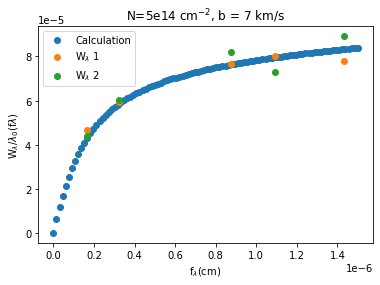

In [275]:
plt.scatter(flam,Wlam1,label='Calculation')
plt.scatter(fl,wlam2l,label='W$_{\lambda}$ 1')
plt.scatter(fl,wlam1l,label='W$_{\lambda}$ 2')
plt.title('N=5e14 cm$^{-2}$, b = 7 km/s')
plt.ylabel('W$_{\lambda}$/$\lambda_0$(f$\lambda$)')
plt.xlabel('f$_{\lambda}$(cm)')
plt.legend()
plt.savefig('N_5_e_14_b_7',type='png')

/Users/ka8km/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  


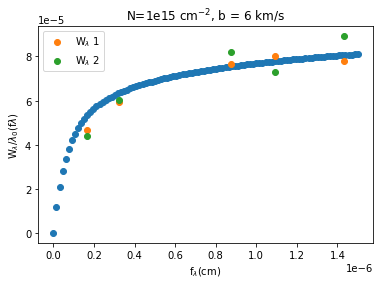

In [280]:
plt.scatter(flam,Wlam1)
plt.scatter(fl,wlam2l,label='W$_{\lambda}$ 1')
plt.scatter(fl,wlam1l,label='W$_{\lambda}$ 2')
plt.title('N=1e15 cm$^{-2}$, b = 6 km/s')
plt.ylabel('W$_{\lambda}$/$\lambda_0$(f$\lambda$)')
plt.xlabel('f$_{\lambda}$(cm)')
plt.legend()
plt.savefig('N_1_e_15_b_6',type='png')